In [1]:
#import the required libraries
import pandas as pd
import numpy as np

# **Load the datasets**

In [2]:
#importing dataset
df=pd.read_csv('uber.csv')
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# **Describe the dataset**

In [3]:
# understand the structure and content of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [4]:
# gaining insights into the numerical characteristics of the DataFrame's columns.
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


# **Data Preprocessing and Cleaning**
> Handling missing values,if necessary, remove outliers, and converting data types as needed.

In [5]:
# checking the null values
var1 = df.isna().sum().sum()
if var1 == 0:
    print('There are no null values in dataset')
else:
    print(f'There are {var1} null values in dataset')
    
print()

There are 2 null values in dataset



In [6]:
#cheching where is null value
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
# replace null value by mean and median value
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)


In [8]:
# change the Incorrect data type.
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [9]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1


In [10]:
# we will extract time feature from the 'pickup_datetime' 
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)

In [11]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,14,20,5,2015,2


# **Heversine formula**
> hav(θ) = sin**2(θ/2).

A mathematical equation used to calculate the distance between two points on a sphere, given their latitude and longitude coordinates. It considers the curvature of the Earth and is commonly used in navigation and geographical calculations.

In [12]:
from math import *
# function to calculate the travel distance from the longitudes and latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [13]:
# calculates the travel distance in kilometers between pickup and dropoff locations using the Haversine formula and assigns the result to a new column 'dist_travel_km' in the DataFrame.
df['dist_travel_km'] = distance_transform(df['pickup_longitude'].to_numpy(),
                                                df['pickup_latitude'].to_numpy(),
                                                df['dropoff_longitude'].to_numpy(),
                                                df['dropoff_latitude'].to_numpy()
                                              )

In [14]:
#check the dataset
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


In [15]:
# drop the column  'key' ,'Unnamed: 0' and 'pickup_daetime'
df = df.drop(['pickup_datetime'],axis=1)

In [16]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


### Saving the data to csv file

In [17]:
df.to_csv('prediction.csv')

In [18]:
# retrieves the minimum value of the 'fare_amount' column in the DataFrame, indicating the lowest recorded fare amount in the dataset
df.fare_amount.min()

-52.0

## Outliers
> Outliers are data points that significantly deviate from the overall pattern or distribution of the dataset. They can be exceptionally high or low values that may distort statistical analysis or model performance, and they are important to identify and handle appropriately to avoid biased results or skewed interpretations of the data.

In [19]:
import matplotlib.pyplot as plt

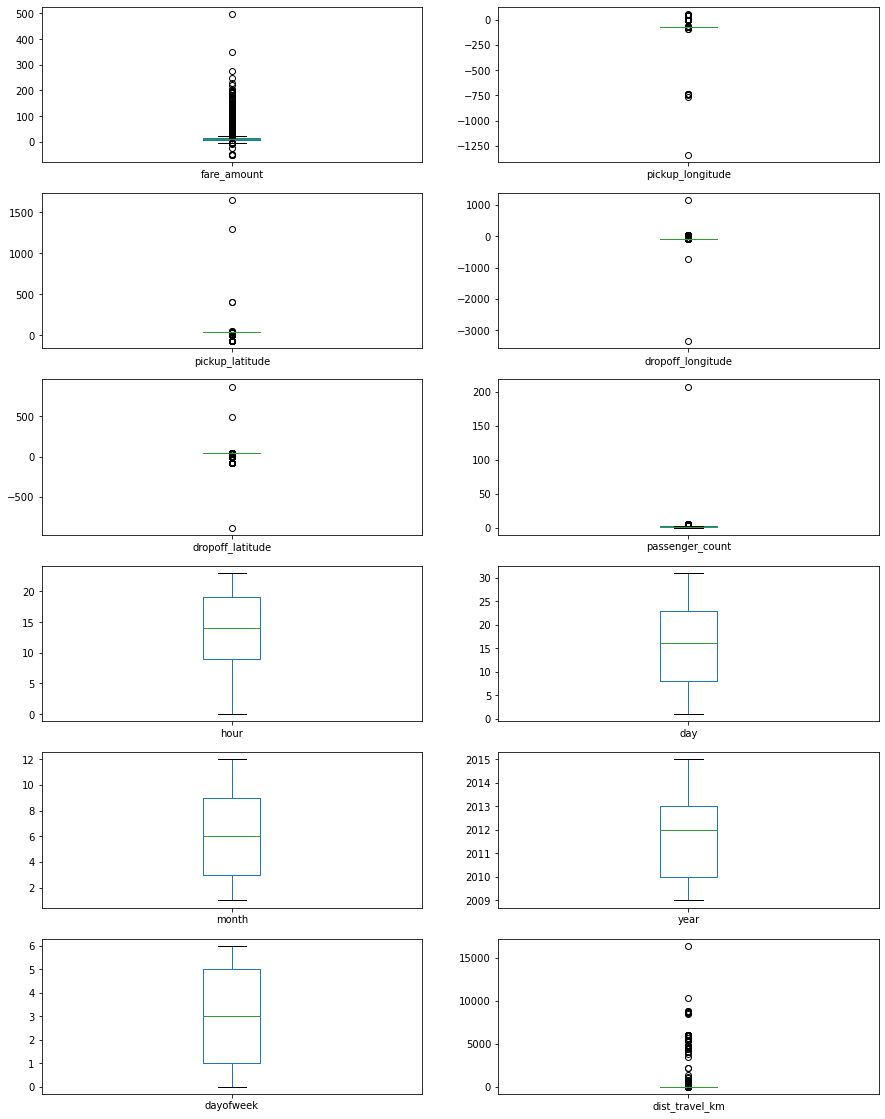

In [20]:
# Boxplot to check the outliers
df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20)) 
plt.show()

In [21]:
# Resolving the outliers
#IQR to fill in the blanks 
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

df = treat_outliers_all(df , df.iloc[: , 0::])


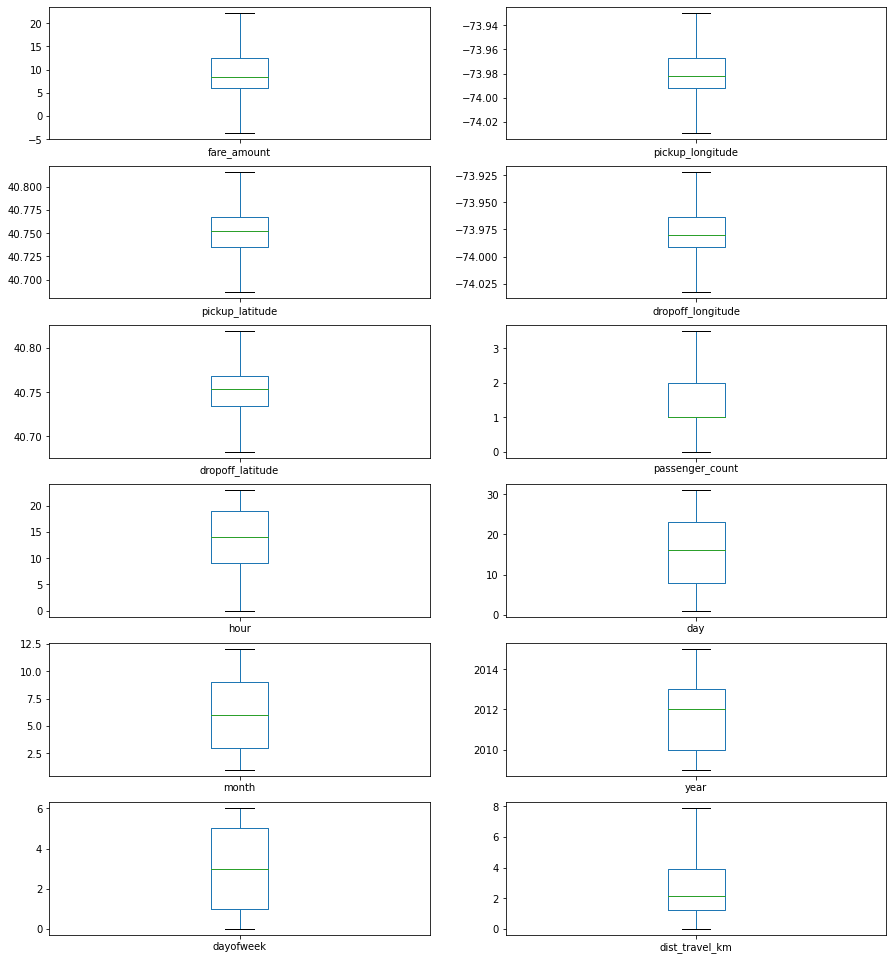

In [22]:
#Outlier check
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 
plt.show()

# Exploratory data analysis-EDA

## Correlation
Quantifies the relationship between two variables. It indicates the degree to which the variables tend to change together, ranging from -1 (strong negative correlation) to 1 (strong positive correlation), with 0 indicating no linear relationship.

In [23]:
# generate the correlation of the numeric variables
corr = df.corr() 
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.154069,-0.110842,0.218675,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652,0.844374
pickup_longitude,0.154069,1.000000,0.259497,0.425619,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652,0.098094
pickup_latitude,-0.110842,0.259497,1.000000,0.048889,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310,-0.046812
dropoff_longitude,0.218675,0.425619,0.048889,1.000000,0.245667,-0.009303,-0.046558,-0.004007,0.002391,0.011346,-0.003336,0.186531
dropoff_latitude,-0.125898,0.073290,0.515714,0.245667,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919,-0.038900
passenger_count,0.015778,-0.013213,-0.012889,-0.009303,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550,0.009709
hour,-0.023623,0.011579,0.029681,-0.046558,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.038366
day,0.004534,-0.003204,-0.001553,-0.004007,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617,0.003062
month,0.030817,0.001169,0.001562,0.002391,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,0.011628
year,0.141277,0.010198,-0.014243,0.011346,-0.009603,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113,0.024278


## Correlation Heatmap
The diagonal entries are all '1' which represents the correlation of the variable with itself. The dark green squares represent the variables with strong positive correlation. The dark red squares represent the variables with strong negative correlation.

In [24]:
import seaborn as sns

<AxesSubplot:title={'center':'Correlation Heatmap'}>

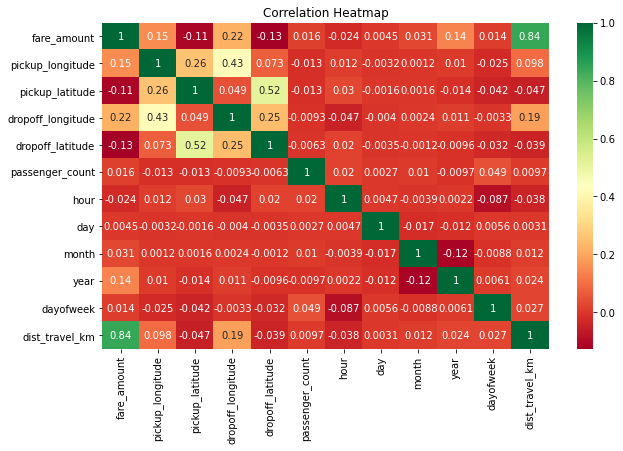

In [25]:
fig,axis = plt.subplots(figsize = (10,6))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr(), cmap ='RdYlGn',annot = True) 

In [26]:
# Descriptive Statistics
numeric_cols = ['fare_amount', 'passenger_count', 'dist_travel_km']
print("Summary statistics:")
print(df[numeric_cols].describe())

Summary statistics:
         fare_amount  passenger_count  dist_travel_km
count  200000.000000    200000.000000   200000.000000
mean       10.081121         1.514368        2.854166
std         5.440253         0.876722        2.223797
min        -3.750000         0.000000        0.000000
25%         6.000000         1.000000        1.215222
50%         8.500000         1.000000        2.121005
75%        12.500000         2.000000        3.875248
max        22.250000         3.500000        7.865286


# **Distribution of Rides by Hour**
This plot visually represents the distribution of rides based on the hour of the day. And the plot enabling data-driven decision-making and potential optimizations in ride-sharing or transportation services.

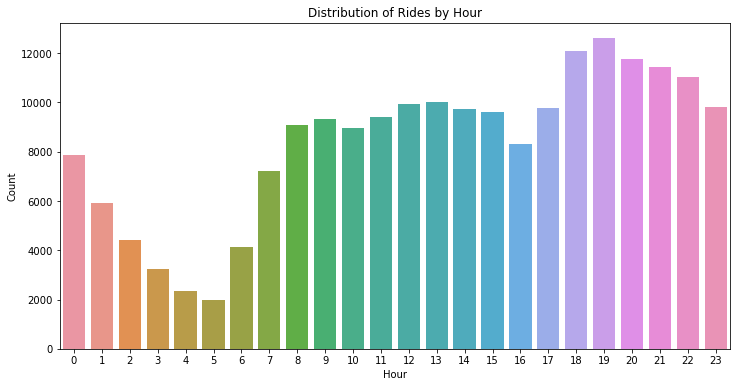

In [27]:
# Data Visualization
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df)
plt.title('Distribution of Rides by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

# **Pickup Location**

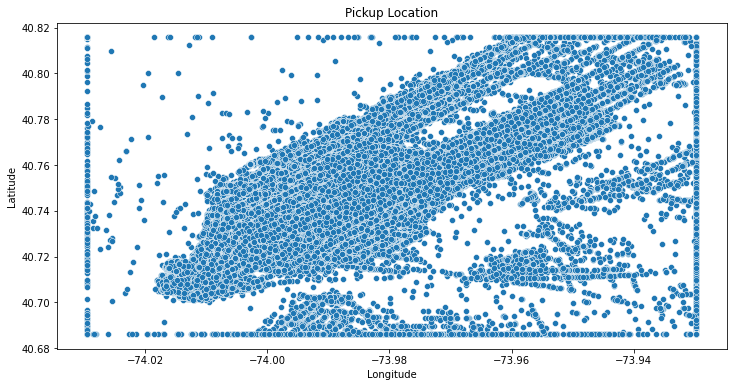

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df)
plt.title('Pickup Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# **Distribution of Rides**
These plot visually represents the distribution of rides based on the hour, month, year and dayofweek. And these plot enabling data-driven decision-making and potential optimizations in ride-sharing or transportation services.

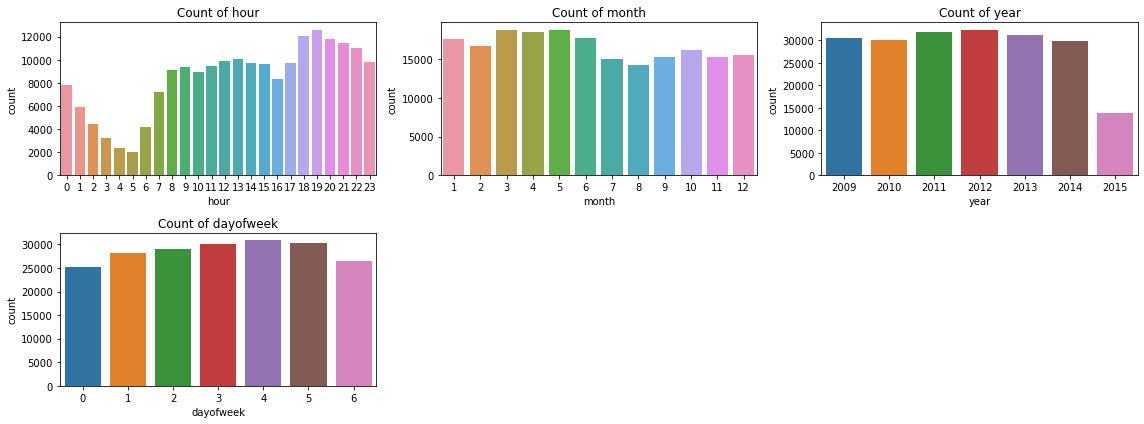

In [29]:
# Categorical Variable Analysis
categorical_cols = ['hour', 'month', 'year', 'dayofweek']
plt.figure(figsize=(16, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title('Count of {}'.format(col))
plt.tight_layout()
plt.show()

# **Average Fare Amount**

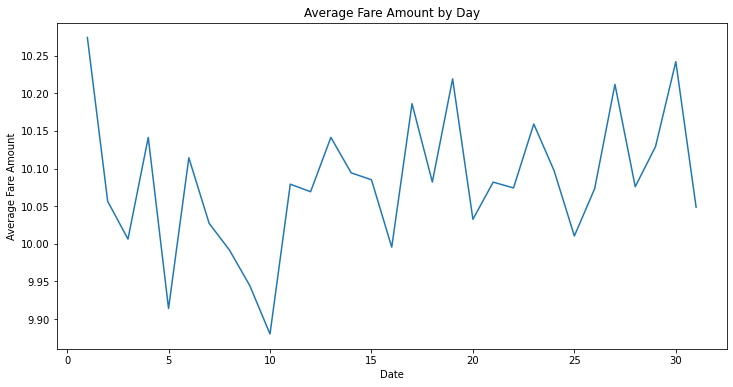

In [30]:
# Group by 'day' and calculate the mean fare amount
daily_average = df.groupby('day')['fare_amount'].mean()

# Plot the average fare amount by day
plt.figure(figsize=(12, 6))
daily_average.plot()
plt.title('Average Fare Amount by Day')
plt.xlabel('Date')
plt.ylabel('Average Fare Amount')
plt.show()

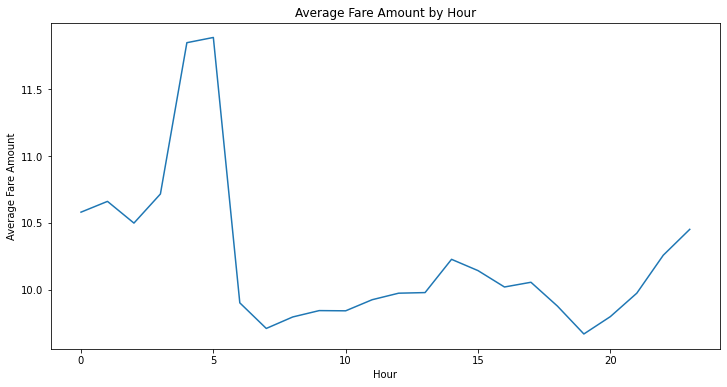

In [31]:
# Group by 'day' and calculate the mean fare amount
daily_average = df.groupby('hour')['fare_amount'].mean()

# Plot the average fare amount by day
plt.figure(figsize=(12, 6))
daily_average.plot()
plt.title('Average Fare Amount by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Fare Amount')
plt.show()

## Rides and Average Fare Amount by Hour

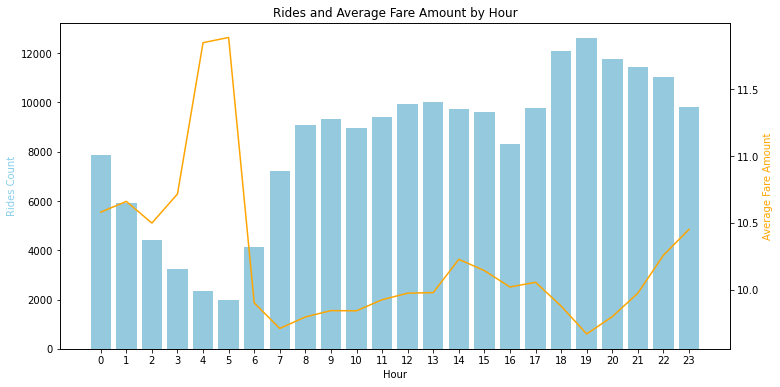

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'hour' and calculate the count of rides and the average fare amount
rides_by_hour = df.groupby('hour').size()
average_fare_by_hour = df.groupby('hour')['fare_amount'].mean()

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot rides by hour (bar plot)
sns.barplot(x=rides_by_hour.index, y=rides_by_hour, ax=ax1, color='skyblue')
ax1.set_ylabel('Rides Count', color='skyblue')
ax1.set_xlabel('Hour')
ax1.set_title('Rides and Average Fare Amount by Hour')

# Create a twin y-axis for average fare amount (line plot)
ax2 = ax1.twinx()
sns.lineplot(x=average_fare_by_hour.index, y=average_fare_by_hour, ax=ax2, color='orange')
ax2.set_ylabel('Average Fare Amount', color='orange')

# Display the plot
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [34]:
# Split the data into features (X) and target variable (y)
X = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 1.8251465794808794
Root Mean Squared Error: 2.7777431515305917
R-squared: 0.7406586616709624


In [37]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

In [ ]:
df